In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/My Drive/HousePrices_HalfMil.csv", sep = ";")

In [6]:
df.head(10)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0
7,37550,172,2,2,3,1,0
8,31500,62,1,4,2,0,0
9,37650,218,3,1,0,1,0


In [7]:
df.shape

(1000, 7)

In [8]:
df.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


In [9]:
df.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


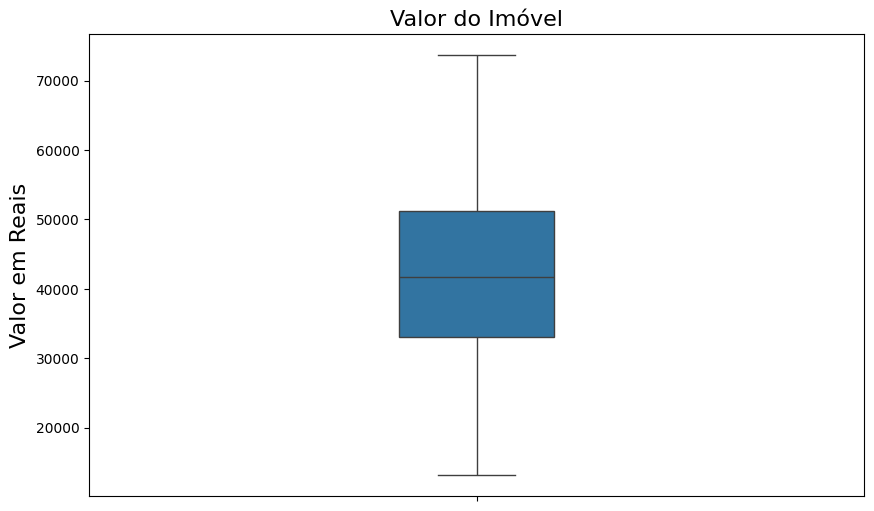

In [10]:
ax = sns.boxplot(data = df["precos"], orient = "v", width = 0.2)
ax.figure.set_size_inches(10, 6)
ax.set_title("Valor do Imóvel", fontsize = 16)
ax.set_ylabel("Valor em Reais", fontsize = 16)

plt.show()

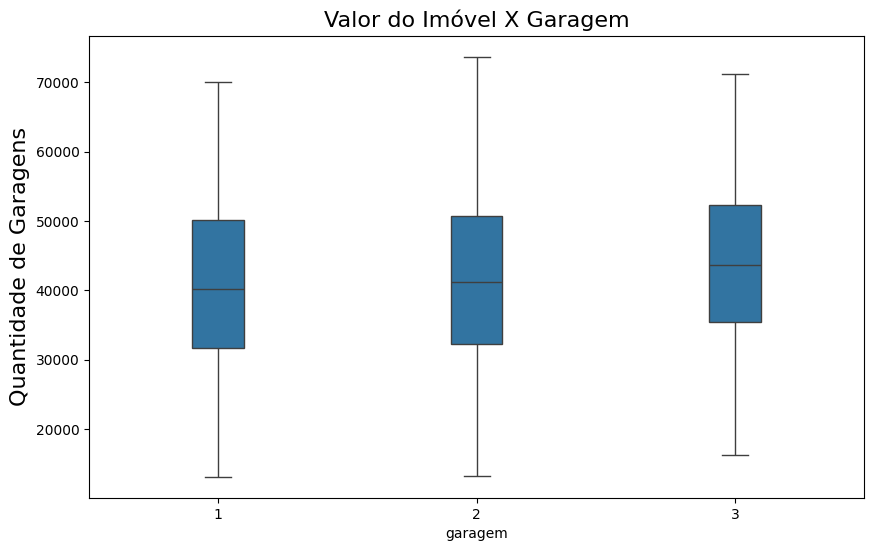

In [11]:
ax = sns.boxplot(data = df, y = "precos", x = "garagem", orient='v', width=0.2)
ax.figure.set_size_inches(10,6)
ax.set_title("Valor do Imóvel X Garagem", fontsize = 16)
ax.set_ylabel("Quantidade de Garagens", fontsize = 16)

plt.show()

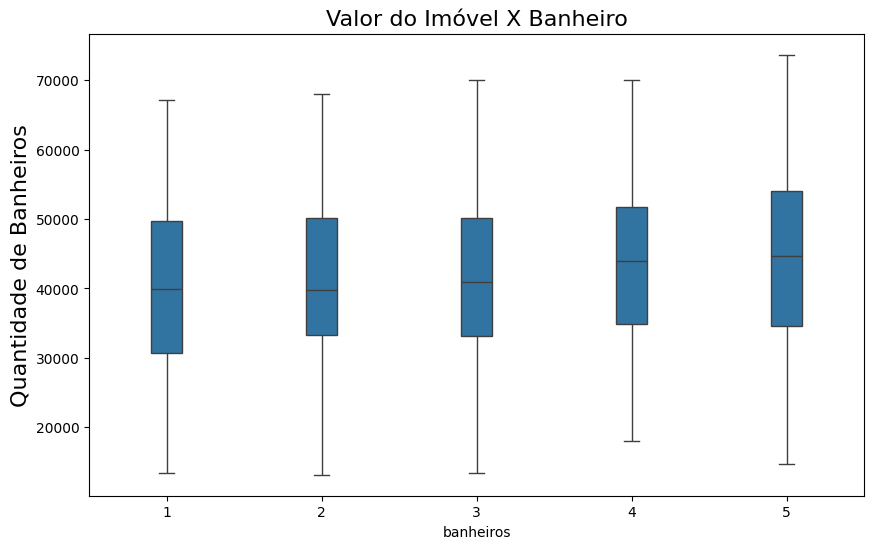

In [12]:
ax = sns.boxplot(y= "precos", x = "banheiros", data = df, orient='v', width=0.2)
ax.figure.set_size_inches(10,6)
ax.set_title("Valor do Imóvel X Banheiro", fontsize = 16)
ax.set_ylabel("Quantidade de Banheiros", fontsize = 16)

plt.show()

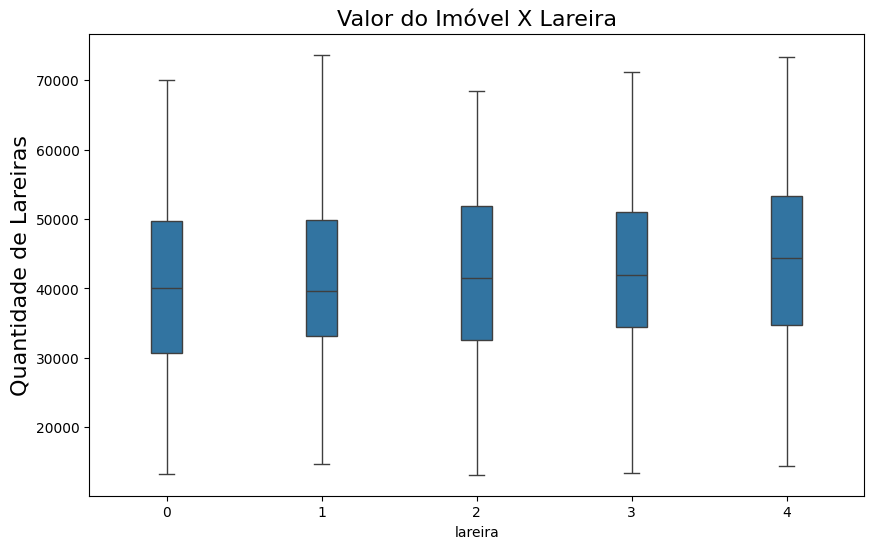

In [13]:
ax = sns.boxplot(y= "precos", x = "lareira", data = df, orient='v', width=0.2)
ax.figure.set_size_inches(10,6)
ax.set_title("Valor do Imóvel X Lareira", fontsize = 16)
ax.set_ylabel("Quantidade de Lareiras", fontsize = 16)

plt.show()

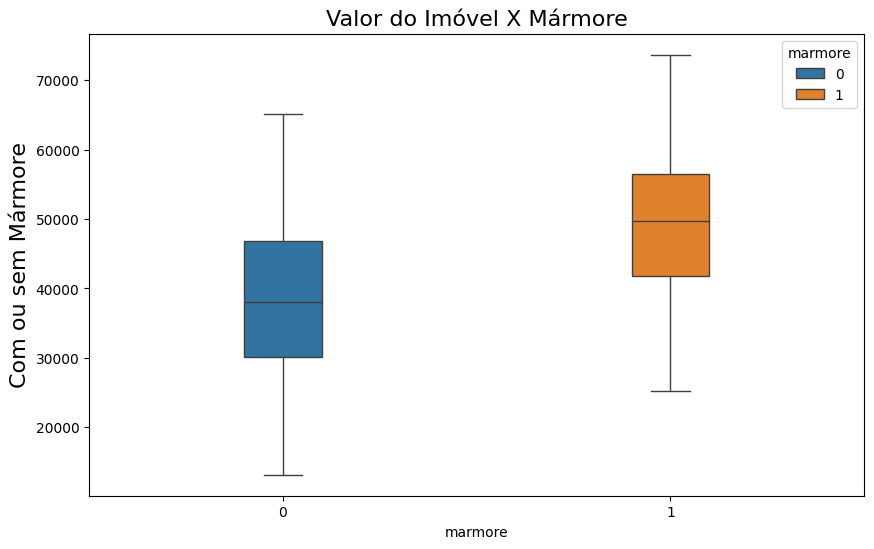

In [14]:
ax = sns.boxplot(y = "precos", x = "marmore", data = df, orient='v', width=0.2, hue = "marmore")
ax.figure.set_size_inches(10,6)
ax.set_title("Valor do Imóvel X Mármore", fontsize = 16)
ax.set_ylabel("Com ou sem Mármore", fontsize = 16)

plt.show()

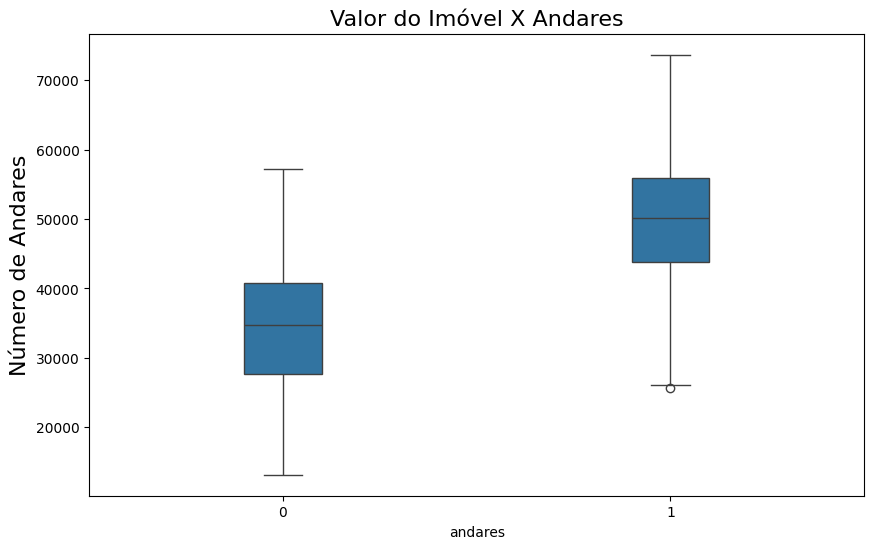

In [15]:
ax = sns.boxplot(y = "precos", x = "andares", data = df, orient='v', width=0.2)
ax.figure.set_size_inches(10,6)
ax.set_title("Valor do Imóvel X Andares", fontsize = 16)
ax.set_ylabel("Número de Andares", fontsize = 16)

plt.show()

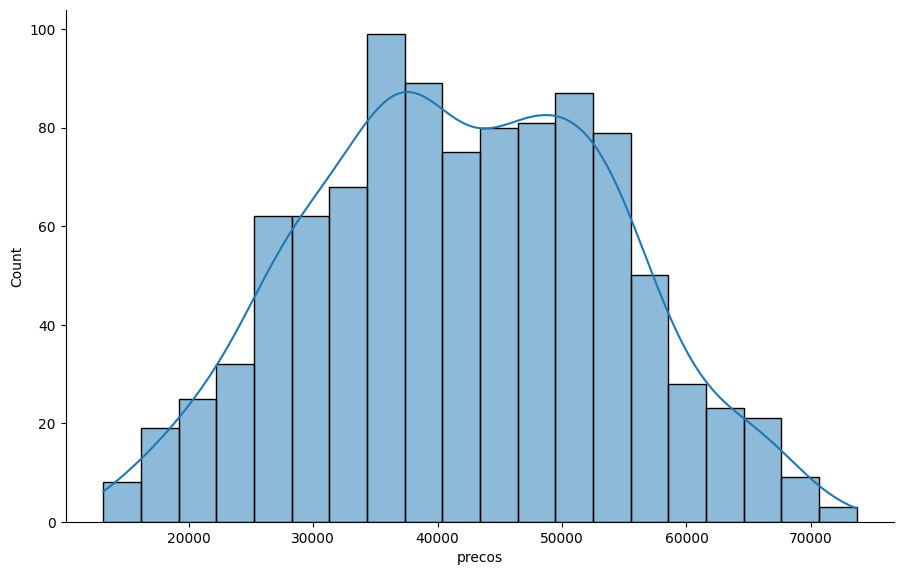

In [43]:
precos = pd.DataFrame(df["precos"])
ax = sns.displot(data = precos, x = "precos", kde = True, bins = 20)
ax.figure.set_size_inches(10,6)
plt.show()

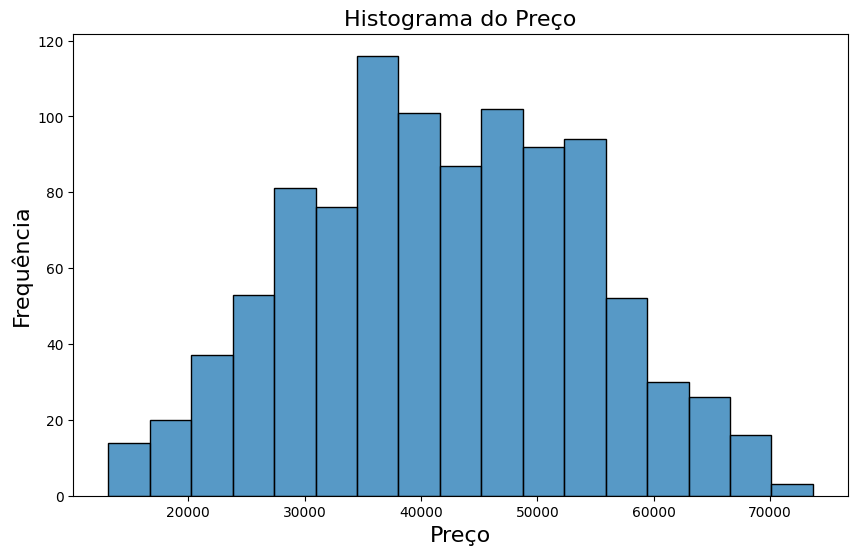

In [44]:
ax = sns.histplot(data = df, x = "precos")
ax.figure.set_size_inches(10,6)
ax.set_title("Histograma do Preço", fontsize = 16)
ax.set_xlabel("Preço", fontsize = 16)
ax.set_ylabel("Frequência", fontsize = 16)

plt.show()

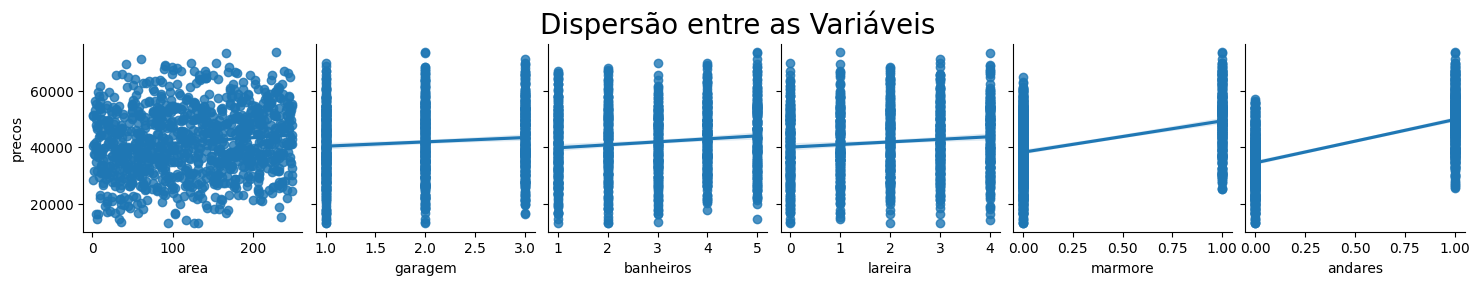

In [49]:
ax = sns.pairplot(df, y_vars="precos", x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind = "reg")
ax.fig.suptitle("Dispersão entre as Variáveis", fontsize = 20, y=1.1)

plt.show()

In [52]:
X = df[["area", "garagem", "banheiros", "lareira", "marmore", "andares"]]
y = df["precos"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"R² = {model.score(X_train, y_train):.2f}")

R² = 0.64


In [65]:
y_prev = model.predict(X_test)

print(f"R² = {metrics.r2_score(y_test, y_prev):.2f}")

R² = 0.67


In [95]:
# Simulando um caso de entrada

area = 200
garagem = 1
banheiros = 2
lareira = 1
marmore = 1
andares = 3
entrada = pd.DataFrame([[area, garagem, banheiros, lareira, marmore, andares]],
                         columns=["area", "garagem", "banheiros", "lareira", "marmore", "andares"])

saida = model.predict(entrada)[0]

print(f"{saida:.2f} Reais")

84860.79 Reais


In [104]:
mse = round(metrics.mean_squared_error(y_test, y_prev), 2)
rmse = round(float(np.sqrt(metrics.mean_squared_error(y_test, y_prev))), 2)
r2 = round(metrics.r2_score(y_test, y_prev), 2)

pd.DataFrame([mse, rmse, r2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,50197019.50
RMSE,7084.99
R²,0.67


In [110]:
caminho_arquivo = '/content/drive/My Drive/modelos/model_house_prices'

with open(caminho_arquivo, 'wb') as arquivo_saida:
  pickle.dump(model, arquivo_saida)